<a href="https://colab.research.google.com/github/AJ-0504/Grade-Moderation-System/blob/main/GradeModerationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
path='/content/student-scores.csv'
df=pd.read_csv(path)

In [ ]:
df.head()

,id,section,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,dsml,aisc,iss,pe,se,total score
0,219001001,E,male,False,3,False,27,73,93,97,80,87,430
1,219001002,B,female,False,2,False,47,90,96,100,88,90,464
2,219001003,F,female,False,9,True,13,81,95,96,77,94,443
3,219001004,A,female,False,5,False,3,71,88,80,63,86,388
4,219001005,F,male,False,5,False,10,84,65,65,74,76,364


In [ ]:
df.shape

(2000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   section                     2000 non-null   object
 2   gender                      2000 non-null   object
 3   part_time_job               2000 non-null   bool  
 4   absence_days                2000 non-null   int64 
 5   extracurricular_activities  2000 non-null   bool  
 6   weekly_self_study_hours     2000 non-null   int64 
 7   dsml                        2000 non-null   int64 
 8   aisc                        2000 non-null   int64 
 9   iss                         2000 non-null   int64 
 10  pe                          2000 non-null   int64 
 11  se                          2000 non-null   int64 
 12  total score                 2000 non-null   int64 
dtypes: bool(2), int64(9), object(2)
memory usage: 17

In [ ]:
df.head()

,id,section,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,dsml,aisc,iss,pe,se,total score
0,219001001,E,male,False,3,False,27,73,93,97,80,87,430
1,219001002,B,female,False,2,False,47,90,96,100,88,90,464
2,219001003,F,female,False,9,True,13,81,95,96,77,94,443
3,219001004,A,female,False,5,False,3,71,88,80,63,86,388
4,219001005,F,male,False,5,False,10,84,65,65,74,76,364


In [ ]:
pd.isnull(df).sum()

id                            0
section                       0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
dsml                          0
aisc                          0
iss                           0
pe                            0
se                            0
total score                   0
dtype: int64

In [ ]:
df.describe()

,id,absence_days,weekly_self_study_hours,dsml,aisc,iss,pe,se,total score
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.190020e+08,3.665500,17.755500,83.452000,81.336500,79.995000,81.277500,80.888000,406.949000
std,5.774946e+02,2.629271,12.129604,13.224906,12.539453,12.777895,12.027087,11.637705,32.597956
min,2.190010e+08,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,60.000000,282.000000
25%,2.190015e+08,2.000000,5.000000,77.000000,71.000000,69.000000,72.000000,71.000000,387.000000
50%,2.190020e+08,3.000000,18.000000,87.000000,83.000000,81.000000,83.000000,81.000000,408.000000
75%,2.190025e+08,5.000000,28.000000,93.000000,92.000000,91.000000,91.000000,91.000000,428.000000
max,2.190030e+08,10.000000,50.000000,100.000000,100.000000,100.000000,99.000000,100.000000,485.000000


In [ ]:
df[['absence_days','weekly_self_study_hours','dsml','aisc','iss','pe','se','total score']].describe()

,absence_days,weekly_self_study_hours,dsml,aisc,iss,pe,se,total score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.665500,17.755500,83.452000,81.336500,79.995000,81.277500,80.888000,406.949000
std,2.629271,12.129604,13.224906,12.539453,12.777895,12.027087,11.637705,32.597956
min,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,60.000000,282.000000
25%,2.000000,5.000000,77.000000,71.000000,69.000000,72.000000,71.000000,387.000000
50%,3.000000,18.000000,87.000000,83.000000,81.000000,83.000000,81.000000,408.000000
75%,5.000000,28.000000,93.000000,92.000000,91.000000,91.000000,91.000000,428.000000
max,10.000000,50.000000,100.000000,100.000000,100.000000,99.000000,100.000000,485.000000


# Exploratory DATA Analysis

In [ ]:
df.columns

Index(['id', 'section', 'gender', 'part_time_job', 'absence_days',
       'extracurricular_activities', 'weekly_self_study_hours', 'dsml', 'aisc',
       'iss', 'pe', 'se', 'total score'],
      dtype='object')

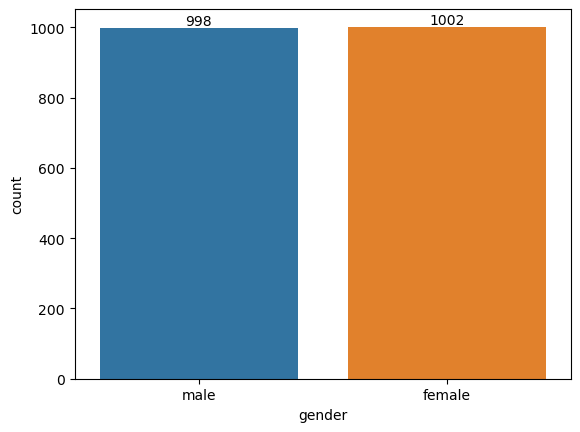

In [ ]:
mf=sns.countplot(x="gender",data=df)
for bars in mf.containers:
    mf.bar_label(bars)

males and females strength are equal

<Axes: xlabel='gender', ylabel='total score'>

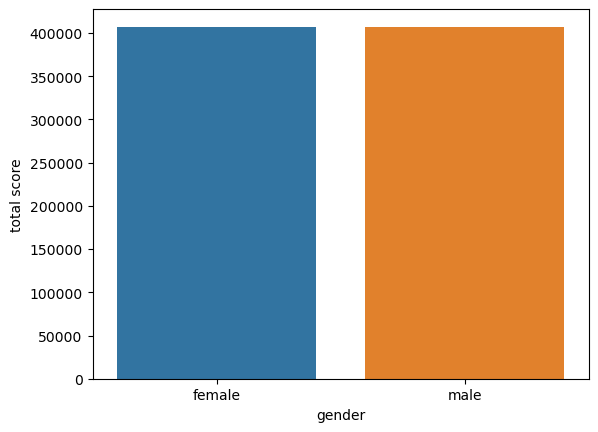

In [ ]:
mf_score = df.groupby(['gender'], as_index=False)['total score'].sum().sort_values(by='total score', ascending=False)
sns.barplot(x = 'gender',y= 'total score' ,data = mf_score)

total marks scored are identical

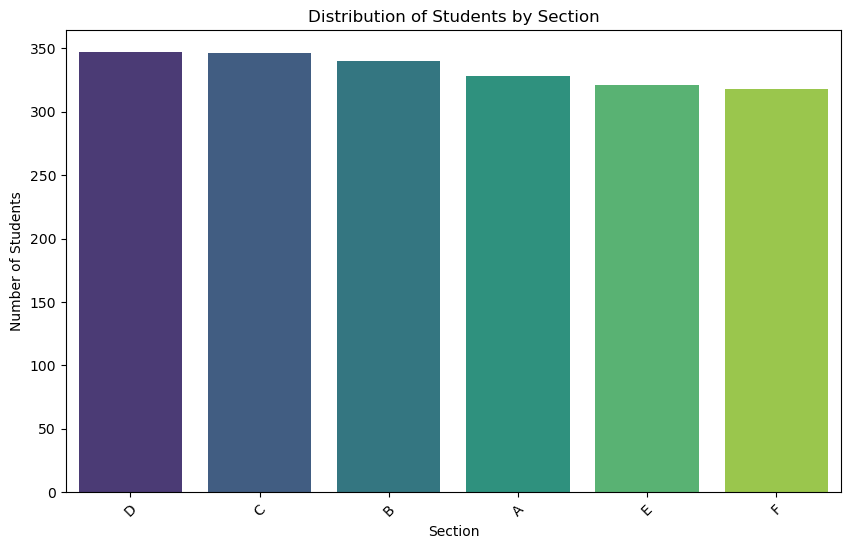

In [ ]:
section_counts = df['section'].value_counts()

# Plotting section-wise distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=section_counts.index, y=section_counts.values, palette='viridis')
plt.title('Distribution of Students by Section')
plt.xlabel('Section')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

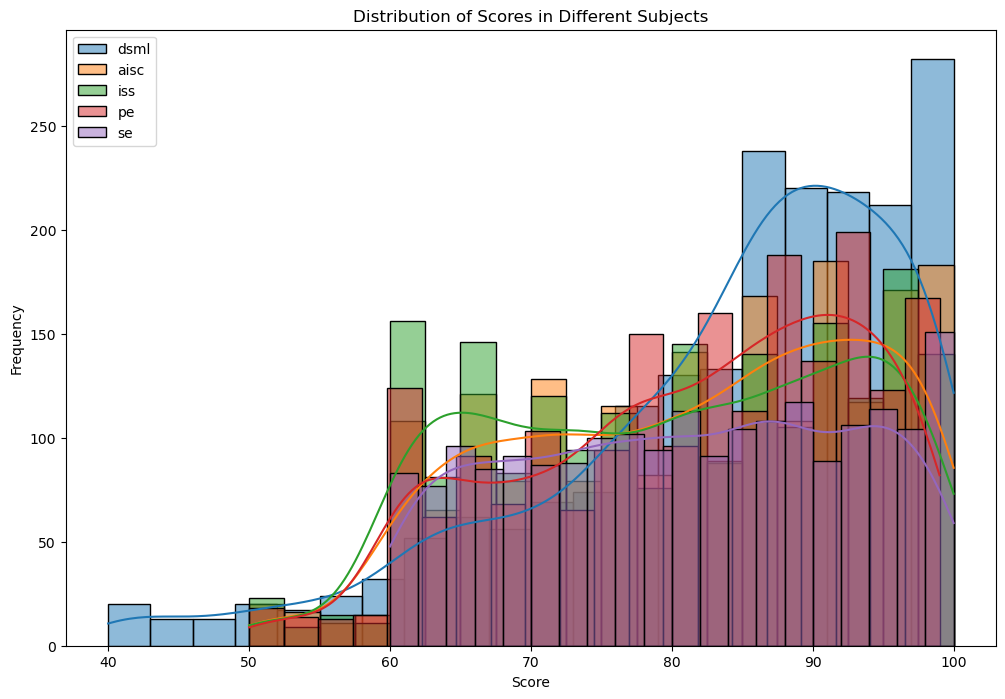

In [ ]:
subject_columns = ['dsml', 'aisc', 'iss', 'pe', 'se']

# Plotting subject-wise scores distribution
plt.figure(figsize=(12, 8))
for subject in subject_columns:
    sns.histplot(df[subject], kde=True, bins=20, label=subject, alpha=0.5)
plt.title('Distribution of Scores in Different Subjects')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

dsml has both lowest scores as well as highest scores from all the sections

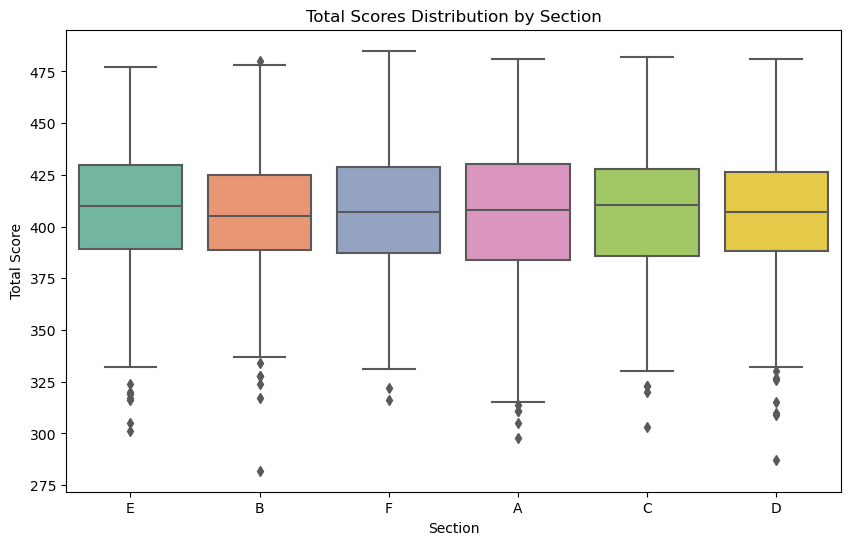

In [ ]:
# Box plot of total scores by section
plt.figure(figsize=(10, 6))
sns.boxplot(x='section', y='total score', data=df, palette='Set2')
plt.title('Total Scores Distribution by Section')
plt.xlabel('Section')
plt.ylabel('Total Score')
plt.show()

this graph suggests that the total scores are distributed in a similar way across all sections
There are very few outliers, which means that most of the data points are within the expected range.

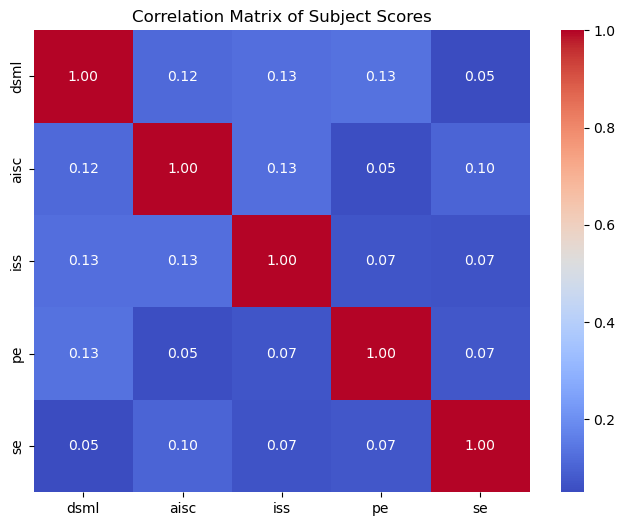

In [ ]:
# Correlation matrix heatmap of subject scores
subject_corr = df[['dsml', 'aisc', 'iss', 'pe', 'se']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(subject_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Subject Scores')
plt.show()

there is no relationship between marks of 1 subject affecting any other subject

In [ ]:
from scipy.stats import f_oneway

# Extract scores for each section
section_scores = []

for section in df['section'].unique():
    section_scores.append(df[df['section'] == section]['total score'])

# Perform ANOVA test
f_statistic, p_value = f_oneway(*section_scores)

# Print results
print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than", alpha, ", so we reject the null hypothesis.")
    print("There are significant differences in the mean scores among different sections.")
else:
    print("The p-value is greater than or equal to", alpha, ", so we fail to reject the null hypothesis.")
    print("There are no significant differences in the mean scores among different sections.")


ANOVA Results:
F-statistic: 0.4089538379982388
p-value: 0.8428479184990041
The p-value is greater than or equal to 0.05 , so we fail to reject the null hypothesis.
There are no significant differences in the mean scores among different sections.


based on this analysis, we do not have reason to believe that the marks of students vary significantly due to section differences.

## model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
def assign_grade(score):
    if score >= 480:
        return 'A'
    elif score >= 420:
        return 'B'
    elif score >= 390:
        return 'C'
    elif score >= 340:
        return 'D'
    else:
        return 'F'

# Create a new column 'grade' and assign grades based on total score
df['grade'] = df['total score'].apply(assign_grade)
df

,id,section,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,dsml,aisc,iss,pe,se,total score,grade
0,219001001,E,male,False,3,False,27,73,93,97,80,87,430,B
1,219001002,B,female,False,2,False,47,90,96,100,88,90,464,B
2,219001003,F,female,False,9,True,13,81,95,96,77,94,443,B
3,219001004,A,female,False,5,False,3,71,88,80,63,86,388,D
4,219001005,F,male,False,5,False,10,84,65,65,74,76,364,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,219002996,C,male,False,2,False,30,83,84,73,84,82,406,C
1996,219002997,B,male,False,2,False,20,89,73,80,67,73,382,D
1997,219002998,B,female,False,5,False,14,97,63,93,94,78,425,B
1998,219002999,C,female,True,10,True,5,51,72,89,88,75,375,D


In [ ]:
X = df[['dsml', 'aisc', 'iss', 'pe', 'se']]
y = df['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict grades for the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         2
           B       0.83      0.88      0.86       149
           C       0.73      0.67      0.70       139
           D       0.73      0.79      0.76        96
           F       0.73      0.57      0.64        14

    accuracy                           0.77       400
   macro avg       0.60      0.58      0.59       400
weighted avg       0.76      0.77      0.77       400



E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
